#### 1. Setup và Import Libraries

In [3]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import math
import pandas as pd 
import numpy as np
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# --- 0. COLOR PALETTE DEFINITION ---
c = {
    'white':        '#FFFFFF',
    'black':        '#000000',

    'blue_dark':    '#0F2854',
    'blue_medium':  '#1C4D8D',
    'blue_light':   '#4988C4',
    'blue_pale':    '#BDE8F5',

    'gray_light':   '#E5E5E5',
    'gray_medium':  '#CBCBCB',
    'gray_dark':    '#404040',

    'accent_gold':  '#E2A16F'
}
# --- 1. CORE STYLE FUNCTION ---

def apply_my_style(fig, title, subtitle=""):
    """
    Hàm áp dụng style chuẩn cho toàn bộ biểu đồ.
    """
    fig.update_layout(
        title={
            'text': f"<b style='font-size:26px; color:black;'>{title}</b><br>"
                    f"<span style='font-size:16px; color:#666;'>{subtitle}</span>",
            'x': 0.02,
            'y': 0.90,
        
            'xanchor': 'left',
            'yanchor': 'top',
            'font': {'family': "Montserrat, sans-serif"}
        },

        margin=dict(t=100, l=80, r=40, b=80),

        font=dict(family="Montserrat, sans-serif", size=14),
        paper_bgcolor="white",
        plot_bgcolor="white",
        legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99), # Legend gọn gàng

        xaxis=dict(showgrid=False, linecolor='#2C3E50', linewidth=1, mirror=True),
        yaxis=dict(showgrid=False, linecolor='#2C3E50', linewidth=1, mirror=True),
    )
    
    
    return fig

#### 2. Load Data

In [5]:
ACADEMIC_PATH = r'../../data/raw/academic_records.csv'
ADMISSION_PATH = r'../../data/raw/admission.csv'
TEST_PATH = r'../../data/raw/test.csv'

In [ ]:
academic_records = pd.read_csv(ACADEMIC_PATH)
admission = pd.read_csv(ADMISSION_PATH)

In [7]:
print(f"Admission data: {admission.shape}")
print(f"Academic data: {academic_records.shape}")

Admission data: (30217, 6)
Academic data: (105726, 6)


#### 3. Data Overview

In [8]:
academic_records.head()

,MA_SO_SV,HOC_KY,CPA,GPA,TC_DANGKY,TC_HOANTHANH
0,f022ed8d1ac1,HK2 2020-2021,2.19,2.02,18,18
1,f022ed8d1ac1,HK1 2022-2023,0.95,2.12,14,7
2,f022ed8d1ac1,HK1 2023-2024,0.81,1.89,29,16
3,f022ed8d1ac1,HK2 2022-2023,1.37,1.93,26,23
4,f022ed8d1ac1,HK2 2023-2024,1.71,1.91,16,13


In [9]:
admission.head(10)

,MA_SO_SV,NAM_TUYENSINH,PTXT,TOHOP_XT,DIEM_TRUNGTUYEN,DIEM_CHUAN
0,0570116c3448,2018,5,A00,15.86,15.10
1,921cfe1e9ca9,2018,5,A01,15.98,14.98
2,8aeb1516c333,2018,5,A01,17.05,15.18
3,94ff3745a70e,2018,5,A00,18.67,14.78
4,5c5900eb2b53,2018,5,D07,16.67,15.06
5,8d0750fba57a,2018,5,D07,15.64,15.18
6,99cb99df7d82,2018,5,A01,16.62,15.11
7,8fa25c62a675,2018,5,A00,17.08,15.21
8,ec1c686cde60,2018,5,A00,15.37,15.17
9,aa6b745b595b,2021,1,A00,17.74,16.22


In [10]:
academic_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105726 entries, 0 to 105725
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   MA_SO_SV      105726 non-null  object 
 1   HOC_KY        105726 non-null  object 
 2   CPA           105726 non-null  float64
 3   GPA           105726 non-null  float64
 4   TC_DANGKY     105726 non-null  int64  
 5   TC_HOANTHANH  105726 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ MB


In [12]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30217 entries, 0 to 30216
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MA_SO_SV         30217 non-null  object 
 1   NAM_TUYENSINH    30217 non-null  int64  
 2   PTXT             30217 non-null  object 
 3   TOHOP_XT         30217 non-null  object 
 4   DIEM_TRUNGTUYEN  30217 non-null  float64
 5   DIEM_CHUAN       30217 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.4+ MB


#### 4. Statistical Summary

In [13]:
academic_records.describe()

,CPA,GPA,TC_DANGKY,TC_HOANTHANH
count,105726.000000,105726.000000,105726.000000,105726.000000
mean,1.962662,2.290328,19.438492,15.609916
std,0.899984,0.479314,5.584857,6.610703
min,0.000000,0.000000,1.000000,0.000000
25%,1.360000,1.980000,17.000000,12.000000
50%,2.000000,2.250000,20.000000,16.000000
75%,2.600000,2.570000,22.000000,20.000000
max,4.080000,4.080000,71.000000,65.000000


In [14]:
admission.describe()

,NAM_TUYENSINH,DIEM_TRUNGTUYEN,DIEM_CHUAN
count,30217.000000,30217.00000,30217.000000
mean,2021.790979,23.09548,21.173715
std,2.309299,3.76811,3.475354
min,2018.000000,0.00000,0.000000
25%,2020.000000,21.13000,18.940000
50%,2022.000000,23.30000,21.610000
75%,2024.000000,24.92000,23.580000
max,2025.000000,69.39000,61.030000


#### 5. Missing Values Analysis

In [16]:
missing_admission = pd.DataFrame({
    "Column": admission.columns,
    "Missing Count": admission.isnull().sum(),
    "Missing %": (admission.isnull().sum() / len(admission) * 100).round(2)
})
missing_admission[missing_admission['Missing Count'] > 0]

,Column,Missing Count,Missing %


In [17]:
missing_academic = pd.DataFrame({
    "Column": academic_records.columns,
    "Missing Count": academic_records.isnull().sum(),
    "Missing %": (academic_records.isnull().sum() / len(academic_records) * 100).round(2)
})
missing_academic[missing_academic['Missing Count'] > 0]

,Column,Missing Count,Missing %


#### 6. Distribution Analysis

In [18]:
import plotly.graph_objects as go

if 'NAM_TUYENSINH' in admission.columns:
    # --- 1. XỬ LÝ DỮ LIỆU ---
    # Đếm số lượng sinh viên theo năm và sắp xếp theo năm
    df_year_counts = admission['NAM_TUYENSINH'].value_counts().sort_index().reset_index()
    df_year_counts.columns = ['NAM_TUYENSINH', 'Count']

    # --- 2. CẤU HÌNH MÀU SẮC ---
    # Sử dụng màu chủ đạo từ palette của bạn (giả định biến 'c' đã được định nghĩa như trong code mẫu của bạn)
    # Nếu muốn mỗi năm một màu khác nhau thì dùng color_sequence, nhưng biểu đồ tổng quan thường dùng 1 màu chủ đạo.
    main_color = c['blue_dark'] 
    
    # --- 3. VẼ BIỂU ĐỒ BAR CHART ---
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=df_year_counts['NAM_TUYENSINH'],
        y=df_year_counts['Count'],
        name='Sinh viên',
        marker_color=main_color, # Màu xanh đậm chủ đạo
        hovertemplate='Năm %{x}: %{y} sinh viên<extra></extra>', # Hiển thị tooltip gọn gàng
        text=df_year_counts['Count'], # Hiển thị số lượng trên cột
        textposition='auto', # Tự động căn chỉnh vị trí text (trong hoặc ngoài cột)
        texttemplate='%{y:,}', # Định dạng số có dấu phẩy ngăn cách hàng nghìn (VD: 1,200)
        textfont=dict(color='white') # Màu chữ số
    ))

    # --- 4. ÁP DỤNG STYLE VÀ TINH CHỈNH ---
    fig.update_layout(
        xaxis=dict(
            type='category', # Đảm bảo năm hiển thị dạng chữ/nhãn
            title_text="Năm tuyển sinh"
        ),
        yaxis=dict(
            title_text="Số lượng sinh viên",
            # Nếu muốn trục Y bắt đầu từ 0 và dư ra một chút ở trên để số không bị cắt
            rangemode='tozero' 
        )
    )

    # Gọi hàm style của bạn
    fig = apply_my_style(
        fig,
        title="PHÂN PHỐI SINH VIÊN THEO NĂM TUYỂN SINH",
        subtitle="Tổng số lượng sinh viên nhập học chính thức qua các năm"
    )

    fig.show()

In [19]:
df_filter = admission[(admission['PTXT'] == '100') | (admission['PTXT'] == '1')]

def calc_kde(series):
    clean_data = series.dropna()
    if len(clean_data) > 1:
        kde = stats.gaussian_kde(clean_data)
        x = np.linspace(clean_data.min(), clean_data.max(), 500)
        y = kde(x)
        return clean_data, x, y
    return clean_data, [], []

data_dc, x_dc, y_dc = calc_kde(df_filter['DIEM_CHUAN'])

data_tt, x_tt, y_tt = calc_kde(df_filter['DIEM_TRUNGTUYEN'])

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Phân phối ĐIỂM CHUẨN", "Phân phối ĐIỂM TRÚNG TUYỂN"),
    horizontal_spacing=0.1
)

fig.add_trace(go.Histogram(
    x=data_dc,
    histnorm='probability density',
    name='Hist Điểm Chuẩn',
    marker_color=c['blue_medium'], 
    opacity=0.6,
    nbinsx=30,
    showlegend=False 
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=x_dc,
    y=y_dc,
    mode='lines',
    name='KDE Điểm Chuẩn',
    line=dict(color=c['blue_medium'], width=2.5),
    showlegend=False
), row=1, col=1)

fig.add_trace(go.Histogram(
    x=data_tt,
    histnorm='probability density',
    name='Hist Trúng Tuyển',
    marker_color=c['blue_light'], # Màu xanh cho điểm thực tế
    opacity=0.6,
    nbinsx=30,
    showlegend=False
), row=1, col=2)

fig.add_trace(go.Scatter(
    x=x_tt,
    y=y_tt,
    mode='lines',
    name='KDE Trúng Tuyển',
    line=dict(color=c['blue_dark'], width=2.5),
    showlegend=False
), row=1, col=2)

fig = apply_my_style(
    fig,
    title="SO SÁNH ĐIỂM CHUẨN VÀ ĐIỂM TRÚNG TUYỂN THỰC TẾ",
    subtitle="Phân phối mật độ điểm theo phương thức xét tuyển THPT"
)

fig.update_layout(
    bargap=0.05,
    showlegend=False
)

fig.update_xaxes(
    showline=True, 
    linewidth=1, 
    linecolor=c['gray_dark'], 
    mirror=True  
)

fig.update_yaxes(
    showline=True, 
    linewidth=1, 
    linecolor=c['gray_dark'], 
    mirror=True
)

# Cập nhật nhãn trục X, Y
fig.update_xaxes(title_text="Điểm", row=1, col=1)
fig.update_xaxes(title_text="Điểm", row=1, col=2)
fig.update_yaxes(title_text="Mật độ", row=1, col=1)

fig.show()

In [20]:

BIN_SIZE = 0.1 

def calc_scaled_kde(series, bin_width):
    """
    Tính KDE và scale nó lên theo số lượng mẫu để khớp với Histogram count
    """
    clean_data = series.dropna()
    
    if len(clean_data) > 1:
        # 1. Tính KDE cơ bản
        kde = stats.gaussian_kde(clean_data)
        x = np.linspace(clean_data.min(), clean_data.max(), 500)
        y_density = kde(x)
        
        scale_factor = len(clean_data) * bin_width
        y_scaled = y_density * scale_factor
        
        return clean_data, x, y_scaled
    return clean_data, [], []

# Tính toán cho CPA & GPA
data_cpa, x_cpa, y_cpa = calc_scaled_kde(academic_records['CPA'], BIN_SIZE)
data_gpa, x_gpa, y_gpa = calc_scaled_kde(academic_records['GPA'], BIN_SIZE)

# --- 2. KHỞI TẠO SUBPLOTS ---
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Phân phối CPA (Tích lũy)", "Phân phối GPA (Học kỳ)"),
    horizontal_spacing=0.1
)

# --- 3. VẼ CỘT 1: CPA ---
fig.add_trace(go.Histogram(
    x=data_cpa,
    # histnorm='',  <-- Mặc định là count nên không cần khai báo dòng này
    name='SL CPA',
    marker_color=c['blue_medium'],
    opacity=0.7,
    xbins=dict(size=BIN_SIZE), # Cố định độ rộng cột để khớp với đường KDE
    autobinx=False,
    showlegend=False
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=x_cpa,
    y=y_cpa,
    mode='lines',
    name='Xu hướng CPA',
    line=dict(color=c['blue_dark'], width=2.5),
    showlegend=False
), row=1, col=1)

# --- 4. VẼ CỘT 2: GPA ---
fig.add_trace(go.Histogram(
    x=data_gpa,
    name='SL GPA',
    marker_color=c['accent_gold'],
    opacity=0.7,
    xbins=dict(size=BIN_SIZE), # Cố định độ rộng cột
    autobinx=False,
    showlegend=False
), row=1, col=2)

fig.add_trace(go.Scatter(
    x=x_gpa,
    y=y_gpa,
    mode='lines',
    name='Xu hướng GPA',
    line=dict(color=c['gray_dark'], width=2.5),
    showlegend=False
), row=1, col=2)

# --- 5. STYLE & LAYOUT ---
fig = apply_my_style(
    fig,
    title="PHÂN PHỐI ĐIỂM SỐ (SỐ LƯỢNG SINH VIÊN)",
    subtitle=f"Số lượng sinh viên phân bố theo các mức điểm (Độ chia: {BIN_SIZE})"
)

# Cập nhật viền và trục cho cả 2 biểu đồ
fig.update_xaxes(
    title_text="Điểm số (Thang 4)",
    showline=True, linewidth=1, linecolor=c['gray_dark'], mirror=True
)
fig.update_yaxes(
    title_text="Số lượng sinh viên", # Đổi tên trục Y
    showline=True, linewidth=1, linecolor=c['gray_dark'], mirror=True
)

# Tinh chỉnh riêng lẻ
fig.update_xaxes(title_text="Điểm CPA", row=1, col=1)
fig.update_xaxes(title_text="Điểm GPA", row=1, col=2)
fig.update_yaxes(title_text="", row=1, col=2) 

fig.update_layout(
    bargap=0.05,
    showlegend=False
)

fig.show()

In [21]:

data_diem = academic_records['TC_DANGKY']
kde = stats.gaussian_kde(data_diem)
x_range = np.linspace(data_diem.min(), data_diem.max(), 500)
y_kde = kde(x_range)

fig = make_subplots(
    rows=2, cols=1, 
    shared_xaxes=True, 
    vertical_spacing=0.1,
    row_heights=[0.2, 0.8]
)

fig.add_trace(go.Box(
    x=data_diem,
    name='Boxplot',
    boxpoints='outliers', 
    marker_color='#E74C3C', 
    line=dict(width=1.5),
    fillcolor='rgba(231, 76, 60, 0.3)',
    orientation='h' 
), row=1, col=1)

fig.add_trace(go.Histogram(
    x=data_diem,
    histnorm='probability density', 
    name='Histogram',
    marker_color='#3498DB', 
    opacity=0.6,
    nbinsx=40 
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=x_range,
    y=y_kde,
    mode='lines',
    name='KDE (Mật độ)',
    line=dict(color='#2C3E50', width=2.5)
), row=2, col=1)

fig = apply_my_style(
    fig, 
    title="PHÂN PHỐI TÍN CHỈ ĐĂNG KÍ", 
    subtitle="Kết hợp Histogram, KDE và Boxplot để đánh giá số tín chỉ mà sinh viên đăng ký"
)

fig.update_layout(
    showlegend=False, 
    bargap=0.05
)

fig.show()

In [22]:

data_diem = academic_records['TC_HOANTHANH']
kde = stats.gaussian_kde(data_diem)
x_range = np.linspace(data_diem.min(), data_diem.max(), 500)
y_kde = kde(x_range)

fig = make_subplots(
    rows=2, cols=1, 
    shared_xaxes=True, 
    vertical_spacing=0.1,
    row_heights=[0.2, 0.8]
)

fig.add_trace(go.Box(
    x=data_diem,
    name='Boxplot',
    boxpoints='outliers', 
    marker_color='#E74C3C', 
    line=dict(width=1.5),
    fillcolor='rgba(231, 76, 60, 0.3)',
    orientation='h' 
), row=1, col=1)

fig.add_trace(go.Histogram(
    x=data_diem,
    histnorm='probability density', 
    name='Histogram',
    marker_color='#3498DB', 
    opacity=0.6,
    nbinsx=40 
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=x_range,
    y=y_kde,
    mode='lines',
    name='KDE (Mật độ)',
    line=dict(color='#2C3E50', width=2.5)
), row=2, col=1)

fig = apply_my_style(
    fig, 
    title="PHÂN PHỐI TÍN CHỈ HOÀN THÀNH", 
    subtitle="Kết hợp Histogram, KDE và Boxplot để đánh giá số tín chỉ mà sinh viên hoàn thành"
)

fig.update_layout(
    showlegend=False, 
    bargap=0.05
)

fig.show()

#### 7. Correlation Analysis

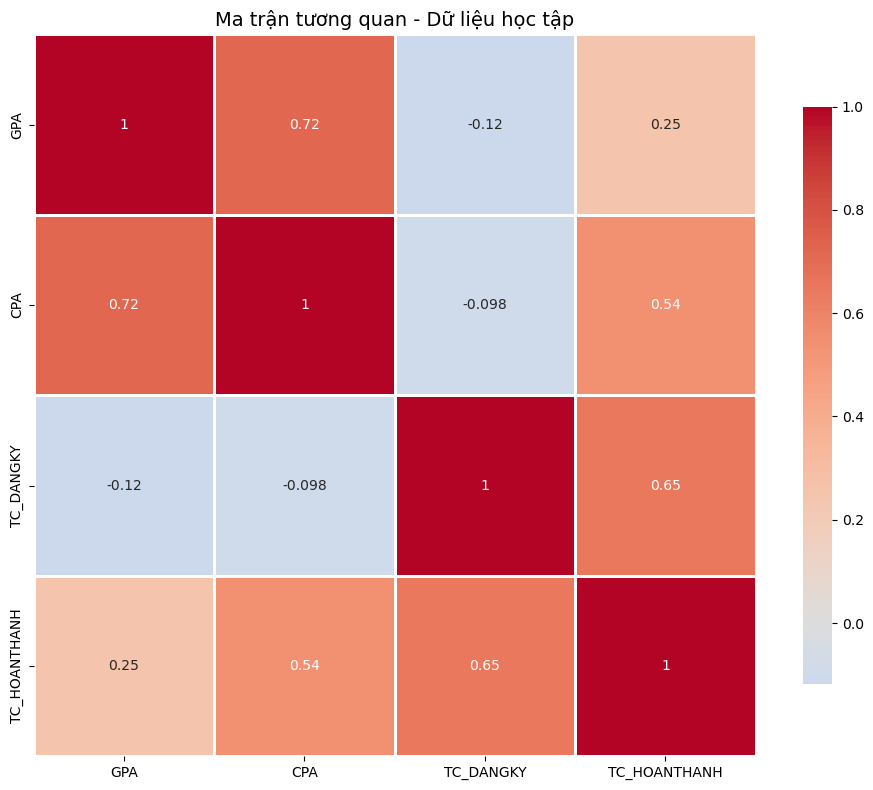

In [23]:
numeric_cols = ['GPA', 'CPA', 'TC_DANGKY', 'TC_HOANTHANH']
correlation_matrix = academic_records[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Ma trận tương quan - Dữ liệu học tập', fontsize=14)
plt.tight_layout()
plt.show()

#### 8. Categorical Features Analysis

In [24]:
ptxt_counts = admission['PTXT'].value_counts()
fig = go.Figure()

fig.add_trace(go.Bar(
    x=ptxt_counts.index,
    y=ptxt_counts.values,
    marker_color=c['blue_medium'],  # Sử dụng màu xanh medium từ palette của bạn
    text=ptxt_counts.values,        # Hiển thị số liệu trên cột
    textposition='auto',            # Tự động căn chỉnh vị trí số
    hovertemplate='<b>%{x}</b><br>Số lượng: %{y}<extra></extra>' # Tooltip khi di chuột vào
))

fig = apply_my_style(
    fig, 
    title='Phân phối phương thức xét tuyển', 
    subtitle='Tổng hợp số lượng sinh viên theo từng phương thức'
)


fig.update_layout(
    xaxis_title="Phương thức xét tuyển",
    yaxis_title="Số lượng sinh viên",
    xaxis=dict(  
        color=c['gray_dark']
    ),
    yaxis=dict(
        color=c['gray_dark']
    ),
    bargap=0.2 # Khoảng cách giữa các cột
)

fig.show()

In [25]:
thxt_counts = admission['TOHOP_XT'].value_counts()
fig = go.Figure()

fig.add_trace(go.Bar(
    x=thxt_counts.index,
    y=thxt_counts.values,
    marker_color=c['blue_medium'],  
    text=thxt_counts.values,     
    textposition='auto',          
    hovertemplate='<b>%{x}</b><br>Số lượng: %{y}<extra></extra>' 
))

fig = apply_my_style(
    fig, 
    title='Phân phối tổ hợp xét tuyển', 
    subtitle='Tổng hợp số lượng sinh viên theo từng tổ hợp'
)


fig.update_layout(
    xaxis_title="Tổ hợp xét tuyển",
    yaxis_title="Số lượng sinh viên",
    xaxis=dict(  
        color=c['gray_dark']
    ),
    yaxis=dict(
        color=c['gray_dark']
    ),
    bargap=0.2 
)

fig.show()

In [26]:
df_grouped = admission.groupby(['NAM_TUYENSINH', 'PTXT']).size().reset_index(name='Count')

df_total = df_grouped.groupby('NAM_TUYENSINH')['Count'].transform('sum')

df_grouped['Percentage'] = (df_grouped['Count'] / df_total) * 100
df_grouped['Percentage'] = df_grouped['Percentage'].round(1) 

color_sequence = [
    c['blue_dark'],    # Màu chủ đạo 1
    c['accent_gold'],  # Màu nổi bật (Highlight)
    c['blue_light'],   # Màu bổ trợ
    c['gray_dark'],    # Màu trung tính
    c['blue_medium']   # Màu dự phòng
]

fig3 = go.Figure()

unique_methods = df_grouped['PTXT'].unique()

for i, method in enumerate(unique_methods):
    df_sub = df_grouped[df_grouped['PTXT'] == method]
    
    fig3.add_trace(go.Bar(
        x=df_sub['NAM_TUYENSINH'],
        y=df_sub['Percentage'],
        name=method,
        marker_color=color_sequence[i % len(color_sequence)], 
        hovertemplate='%{y}%',
        text=df_sub['Percentage'].apply(lambda x: f"{x}%" if x > 5 else ""), 
        textposition='auto',
        textfont=dict(color='white' if i != 1 else 'black')
    ))

fig3.update_layout(
    barmode='stack', 
    xaxis=dict(
        type='category',
        title_text="Năm tuyển sinh"
    ),
    yaxis=dict(
        title_text="Tỉ lệ (%)",
        range=[0, 100] 
    ),
    bargap=0.2
)

fig3 = apply_my_style(
    fig3,
    title="XU HƯỚNG PHƯƠNG THỨC XÉT TUYỂN",
    subtitle="Trong giai đoạn training/valid ch"
)


fig3.show()

In [27]:
df_grouped = admission.groupby(['NAM_TUYENSINH', 'TOHOP_XT']).size().reset_index(name='Count')

df_total = df_grouped.groupby('NAM_TUYENSINH')['Count'].transform('sum')

df_grouped['Percentage'] = (df_grouped['Count'] / df_total) * 100
df_grouped['Percentage'] = df_grouped['Percentage'].round(1) # Làm tròn 1 số thập phân

color_sequence = [
    c['blue_dark'],  
    c['blue_medium'],  
    c['blue_light'],   
    c['blue_pale'],    
    c['gray_light'],
    c['gray_medium'],
    c['gray_dark']
]
   
fig3 = go.Figure()

method_order = (
    df_grouped
    .groupby('TOHOP_XT')['Count']
    .mean()
    .sort_values(ascending=False)
    .index
)

for i, method in enumerate(method_order):
    df_sub = df_grouped[df_grouped['TOHOP_XT'] == method]
    
    fig3.add_trace(go.Bar(
        x=df_sub['NAM_TUYENSINH'],
        y=df_sub['Percentage'],
        name=method,
        width=0.5,
        marker_color=color_sequence[i % len(color_sequence)], 
        hovertemplate='%{y}%', 
        text=df_sub['Percentage'].apply(lambda x: f"{x}%" if x > 5 else ""), 
        textposition='auto',
        textfont=dict(color='white' if i != 1 else 'black') 
    ))

fig3.update_layout(
    barmode='stack', 
    xaxis=dict(
        type='category', 
        title_text="Năm tuyển sinh"
    ),
    yaxis=dict(
        title_text="Tỉ lệ (%)",
        range=[0, 100] 
    )
)

fig3 = apply_my_style(
    fig3,
    title="XU HƯỚNG TỔ HỢP XÉT TUYỂN",
    subtitle="Cơ cấu tỉ lệ sinh viên nhập học phân theo tổ hợp xét tuyển đầu vào"
)
fig3.update_layout(
    legend=dict(
        x=1.02,         
        y=1,             
        xanchor='left',  
        yanchor='top',   

    ),
    margin=dict(r=150) 
)


fig3.show()

#### 9. Target Variable Analysis

Average completion rate: 80.36%
Median completion rate: 90.00%


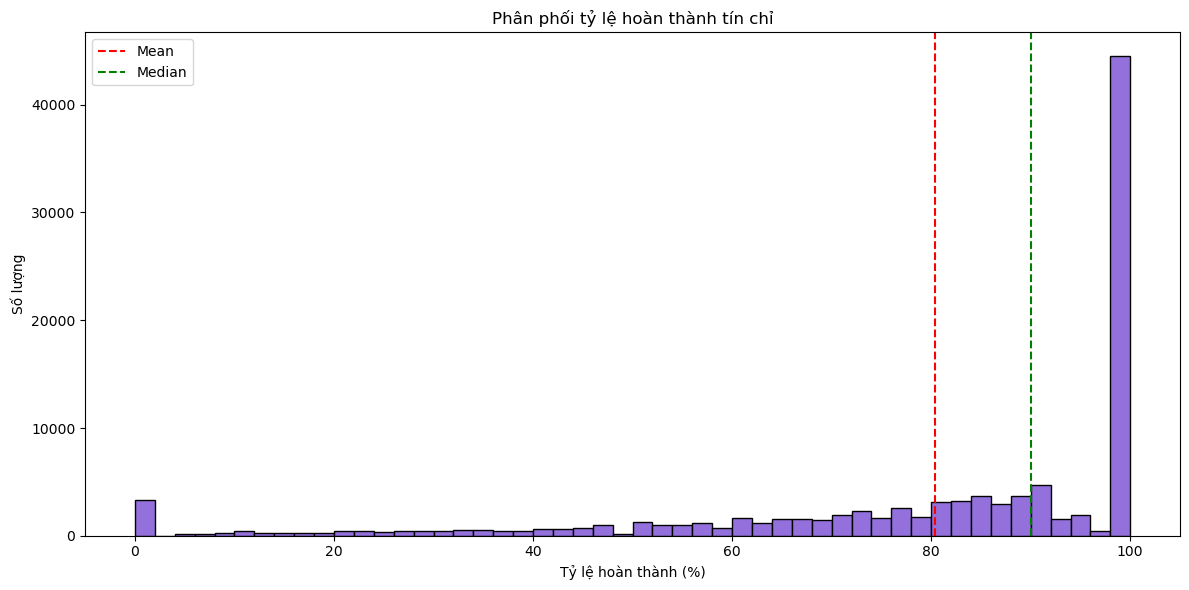

In [42]:
academic_records['completion_rate'] = (academic_records['TC_HOANTHANH'] / academic_records['TC_DANGKY'] * 100)
print(f"Average completion rate: {academic_records['completion_rate'].mean():.2f}%")
print(f"Median completion rate: {academic_records['completion_rate'].median():.2f}%")
plt.figure(figsize=(12, 6))
plt.hist(academic_records['completion_rate'].dropna(), bins=50, edgecolor='black', color='mediumpurple')
plt.xlabel('Tỷ lệ hoàn thành (%)')
plt.ylabel('Số lượng')
plt.title('Phân phối tỷ lệ hoàn thành tín chỉ')
plt.axvline(academic_records['completion_rate'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(academic_records['completion_rate'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.tight_layout()
plt.show()

#### 10. Time Series Analysis

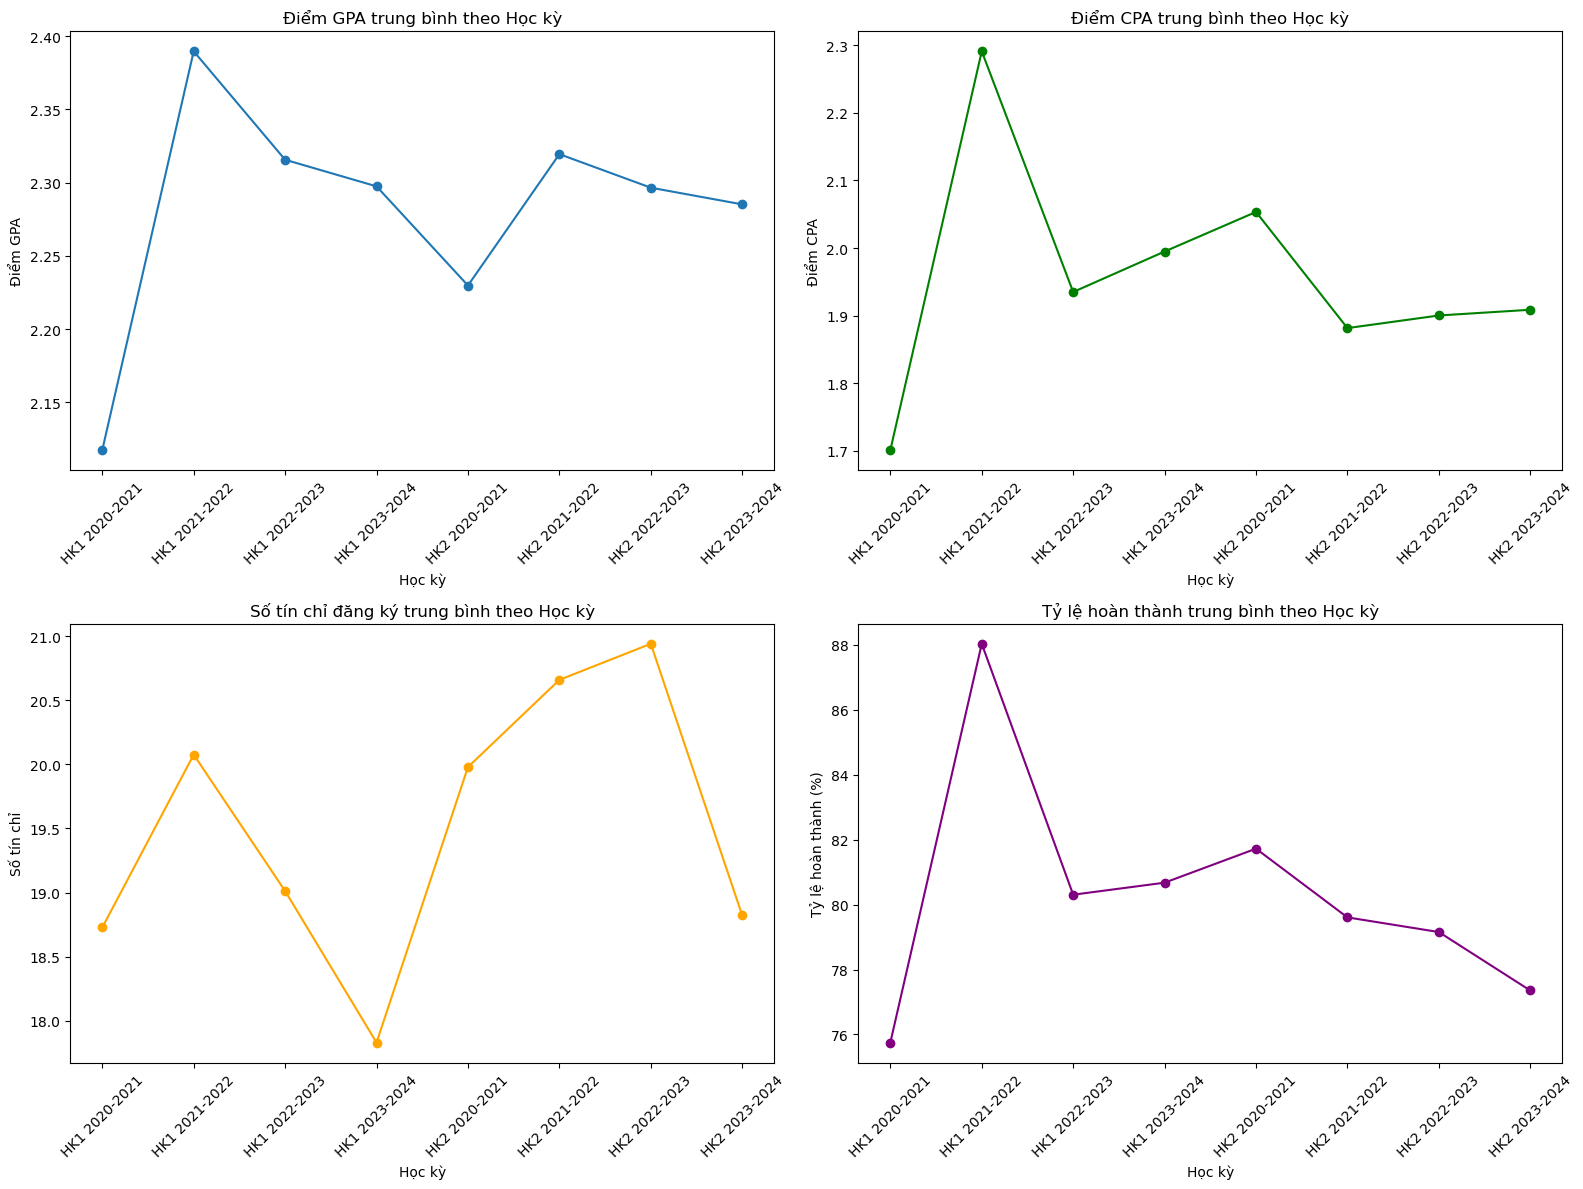

In [47]:
import matplotlib.pyplot as plt

thong_ke_hoc_ky = academic_records.groupby('HOC_KY').agg({
    'GPA': 'mean',
    'CPA': 'mean',
    'TC_DANGKY': 'mean',
    'TC_HOANTHANH': 'mean',
    'completion_rate': 'mean'
}).reset_index()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Biểu đồ GPA trung bình
axes[0, 0].plot(thong_ke_hoc_ky['HOC_KY'], thong_ke_hoc_ky['GPA'], marker='o')
axes[0, 0].set_title('Điểm GPA trung bình theo Học kỳ')
axes[0, 0].set_xlabel('Học kỳ')
axes[0, 0].set_ylabel('Điểm GPA')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Biểu đồ CPA trung bình
axes[0, 1].plot(thong_ke_hoc_ky['HOC_KY'], thong_ke_hoc_ky['CPA'], marker='o', color='green')
axes[0, 1].set_title('Điểm CPA trung bình theo Học kỳ')
axes[0, 1].set_xlabel('Học kỳ')
axes[0, 1].set_ylabel('Điểm CPA')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Biểu đồ Số tín chỉ đăng ký trung bình
axes[1, 0].plot(thong_ke_hoc_ky['HOC_KY'], thong_ke_hoc_ky['TC_DANGKY'], marker='o', color='orange')
axes[1, 0].set_title('Số tín chỉ đăng ký trung bình theo Học kỳ')
axes[1, 0].set_xlabel('Học kỳ')
axes[1, 0].set_ylabel('Số tín chỉ')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Biểu đồ Tỷ lệ hoàn thành trung bình
axes[1, 1].plot(thong_ke_hoc_ky['HOC_KY'], thong_ke_hoc_ky['completion_rate'], marker='o', color='purple')
axes[1, 1].set_title('Tỷ lệ hoàn thành trung bình theo Học kỳ')
axes[1, 1].set_xlabel('Học kỳ')
axes[1, 1].set_ylabel('Tỷ lệ hoàn thành (%)')
axes[1, 1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()